In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pylab as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
plt.rc("font", family="Malgun Gothic")

# 0. Îç∞Ïù¥ÌÑ∞ ÌôïÏù∏

In [15]:
df_info = pd.read_csv('./open/data_info.csv')
df_sample_submission = pd.read_csv('./open/sample_submission.csv')
df_test = pd.read_csv('./open/test.csv')
df_train = pd.read_csv('./open/train.csv')
df_info

Î≥ÄÏàòÎ™Ö           Î≥ÄÏàò ÏÑ§Î™Ö
0                      id             ÏïÑÏù¥Îîî
1               base_date              ÎÇ†Ïßú
2             day_of_week              ÏöîÏùº
3               base_hour             ÏãúÍ∞ÑÎåÄ
4             road_in_use          ÎèÑÎ°úÏÇ¨Ïö©Ïó¨Î∂Ä
5              lane_count             Ï∞®Î°úÏàò
6             road_rating            ÎèÑÎ°úÎì±Í∏â
7            multi_linked         Ï§ëÏö©Íµ¨Í∞Ñ Ïó¨Î∂Ä
8            connect_code          Ïó∞Í≤∞Î°ú ÏΩîÎìú
9     maximum_speed_limit          ÏµúÍ≥†ÏÜçÎèÑÏ†úÌïú
10      weight_restricted          ÌÜµÍ≥ºÏ†úÌïúÌïòÏ§ë
11      height_restricted          ÌÜµÍ≥ºÏ†úÌïúÎÜíÏù¥
12              road_type            ÎèÑÎ°úÏú†Ìòï
13         start_latitude        ÏãúÏûëÏßÄÏ†êÏùò ÏúÑÎèÑ
14        start_longitude        ÏãúÏûëÏßÄÏ†êÏùò Í≤ΩÎèÑ
15  start_turn_restricted  ÏãúÏûë ÏßÄÏ†êÏùò ÌöåÏ†ÑÏ†úÌïú Ïú†Î¨¥
16           end_latitude        ÎèÑÏ∞©ÏßÄÏ†êÏùò ÏúÑÎèÑ
17          end_longitude        ÎèÑÏ∞©ÏßÄÏ†êÏùò Í≤ΩÎèÑ
18    end_turn_restricted   ÎèÑÏûëÏßÄÏ†êÏùò ÌöåÏ†ÑÏ†úÌïú Ïú†Î¨¥
19              road_name             ÎèÑÎ°úÎ™Ö
20        start_node_name           ÏãúÏûëÏßÄÏ†êÎ™Ö
21          end_node_name           ÎèÑÏ∞©ÏßÄÏ†êÎ™Ö
22     vehicle_restricted          ÌÜµÍ≥ºÏ†úÌïúÏ∞®Îüâ
23                 target        ÌèâÍ∑†ÏÜçÎèÑ(km)

In [16]:
df_train.head()

id  base_date day_of_week  base_hour  lane_count  road_rating  \
0  TRAIN_0000000   20220623           Î™©         17           1          106   
1  TRAIN_0000001   20220728           Î™©         21           2          103   
2  TRAIN_0000002   20211010           Ïùº          7           2          103   
3  TRAIN_0000003   20220311           Í∏à         13           2          107   
4  TRAIN_0000004   20211005           Ìôî          8           2          103   

   road_name  multi_linked  connect_code  maximum_speed_limit  ...  road_type  \
0  ÏßÄÎ∞©ÎèÑ1112Ìò∏ÏÑ†             0             0                 60.0  ...          3   
1   ÏùºÎ∞òÍµ≠ÎèÑ11Ìò∏ÏÑ†             0             0                 60.0  ...          0   
2   ÏùºÎ∞òÍµ≠ÎèÑ16Ìò∏ÏÑ†             0             0                 80.0  ...          0   
3        ÌÉúÌèâÎ°ú             0             0                 50.0  ...          0   
4   ÏùºÎ∞òÍµ≠ÎèÑ12Ìò∏ÏÑ†             0             0                 80.0  ...          0   

   start_node_name  start_latitude  start_longitude start_turn_restricted  \
0            Ï†ú3ÍµêÎûòÍµê       33.427747       126.662612                    ÏóÜÏùå   
1            Í¥ëÏñëÏÇ¨Í±∞Î¶¨       33.500730       126.529107                    ÏûàÏùå   
2             Ï∞ΩÍ≥†Ï≤úÍµê       33.279145       126.368598                    ÏóÜÏùå   
3            ÎÇ®ÏñëÎ¶¨Ï°∞Ìä∏       33.246081       126.567204                    ÏóÜÏùå   
4             Ïï†ÏõîÏÉ∑Ïãú       33.462214       126.326551                    ÏóÜÏùå   

   end_node_name  end_latitude end_longitude end_turn_restricted  target  
0          Ï†ú3ÍµêÎûòÍµê     33.427749    126.662335                  ÏóÜÏùå    52.0  
1         KALÏÇ¨Í±∞Î¶¨     33.504811    126.526240                  ÏóÜÏùå    30.0  
2           ÏÉÅÏ∞ΩÏú°Íµê     33.280072    126.362147                  ÏóÜÏùå    61.0  
3           ÏÑúÌòÑÏ£ºÌÉù     33.245565    126.566228                  ÏóÜÏùå    20.0  
4           Ïï†ÏõîÏûÖÍµ¨     33.462677    126.330152                  ÏóÜÏùå    38.0  

[5 rows x 23 columns]

In [17]:
df_train = df_train.drop('id', axis=1) #idÎäî Í≤∞Íµ≠ idxÏôÄ ÎèôÏπòÏù¥ÎØÄÎ°ú Ï†úÍ±∞
df_test = df_test.drop('id',axis=1)

In [18]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4701217 entries, 0 to 4701216
Data columns (total 22 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   base_date              int64  
 1   day_of_week            object 
 2   base_hour              int64  
 3   lane_count             int64  
 4   road_rating            int64  
 5   road_name              object 
 6   multi_linked           int64  
 7   connect_code           int64  
 8   maximum_speed_limit    float64
 9   vehicle_restricted     float64
 10  weight_restricted      float64
 11  height_restricted      float64
 12  road_type              int64  
 13  start_node_name        object 
 14  start_latitude         float64
 15  start_longitude        float64
 16  start_turn_restricted  object 
 17  end_node_name          object 
 18  end_latitude           float64
 19  end_longitude          float64
 20  end_turn_restricted    object 
 21  target                 float64
dtypes: float64(9), int

In [19]:
df_train["base_date"] = pd.to_datetime(df_train["base_date"],format='%Y%m%d')
df_test["base_date"] = pd.to_datetime(df_test["base_date"],format='%Y%m%d')

In [7]:
df_train.describe().T.sort_values(by='std', ascending=False).style.background_gradient(cmap='GnBu')

In [20]:
#multi_linked, vehicle_restricted, height_restrictedÏùò ÌëúÏ§ÄÌé∏Ï∞®Í∞Ä Îß§Ïö∞ÏûëÏùÄÍ≤ÉÏúºÎ°ú Î≥¥ÏïÑ Í∞íÏù¥ Î≥ÑÎ°ú ÏóÜÏùÑ Ïàò ÏûàÏùå
noVal = ['multi_linked', 'vehicle_restricted', 'height_restricted']
for col in (noVal):
    print(df_train[col].value_counts())
    print(df_test[col].value_counts())

0    4698978
1       2239
Name: multi_linked, dtype: int64
0    291241
Name: multi_linked, dtype: int64
0.0    4701217
Name: vehicle_restricted, dtype: int64
0.0    291241
Name: vehicle_restricted, dtype: int64
0.0    4701217
Name: height_restricted, dtype: int64
0.0    291241
Name: height_restricted, dtype: int64


In [21]:
print('multi_linked prop: {0:.4f}'.format(2239/4698978))

multi_linked prop: 0.0005


In [22]:
#ÏÖã Îã§ Î¨¥ÏùòÎØ∏ÌïòÎØÄÎ°ú drop
df_train = df_train.drop(noVal, axis=1)
df_test = df_test.drop(noVal, axis=1)

In [23]:
df_train.info() #Ïó∞ÏÇ∞ ÏÜçÎèÑÎ•º Í≥†Î†§ÌïòÏó¨ 64ÎπÑÌä∏ dtypeÎì§ÏùÑ Îî∞Î°ú Î≥ÄÌôòÌï¥Ï§Ñ ÌïÑÏöîÍ∞Ä ÏûàÏùå..

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4701217 entries, 0 to 4701216
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   base_date              datetime64[ns]
 1   day_of_week            object        
 2   base_hour              int64         
 3   lane_count             int64         
 4   road_rating            int64         
 5   road_name              object        
 6   connect_code           int64         
 7   maximum_speed_limit    float64       
 8   weight_restricted      float64       
 9   road_type              int64         
 10  start_node_name        object        
 11  start_latitude         float64       
 12  start_longitude        float64       
 13  start_turn_restricted  object        
 14  end_node_name          object        
 15  end_latitude           float64       
 16  end_longitude          float64       
 17  end_turn_restricted    object        
 18  target                

In [24]:
def change_dtype(df, col,dtype):
    """
    dtype = str ex. "int 32", "float 32"
    """
    for i in col:
        df[i] = df[i].astype(dtype)

In [30]:
change_dtype(df_train, df_train.select_dtypes('int64').columns, 'int32')
change_dtype(df_train, ['maximum_speed_limit', 'weight_restricted', 'target'], 'float32')

In [37]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4701217 entries, 0 to 4701216
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   base_date              datetime64[ns]
 1   day_of_week            object        
 2   base_hour              int32         
 3   lane_count             int32         
 4   road_rating            int32         
 5   road_name              object        
 6   connect_code           int32         
 7   maximum_speed_limit    float32       
 8   weight_restricted      float32       
 9   road_type              int32         
 10  start_node_name        object        
 11  start_latitude         float64       
 12  start_longitude        float64       
 13  start_turn_restricted  object        
 14  end_node_name          object        
 15  end_latitude           float64       
 16  end_longitude          float64       
 17  end_turn_restricted    object        
 18  target                

- Int32 -- (-2,147,483,648 to 2,147,483,647)
- float 32 -- 	(-3.4 x 10^38 to 3.4 x 10^38)

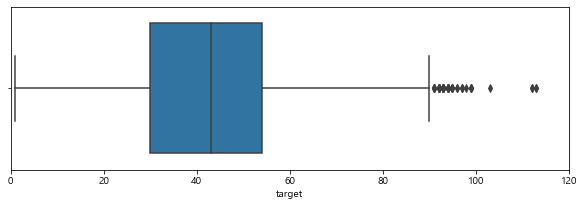

In [38]:
#outlier ÌôïÏù∏
plt.figure(figsize=(10,3))
plt.xlim(0,120)
sns.boxplot(x=df_train['target'])

In [39]:
df_train['target'][df_train['target'] > 100]

242903     112.0
2607664    112.0
3841974    113.0
4386692    113.0
4559340    103.0
Name: target, dtype: float32

In [40]:
df_train['road_name'][df_train['target'] > 100] # outlierÎì§Ïùò Í≥ºÏ†ÅÌï© Î∞©ÏßÄÎ•º ÏúÑÌï¥ ÏßÄÏö∞Í≤†Îã§.

242903     ÏùºÎ∞òÍµ≠ÎèÑ12Ìò∏ÏÑ†
2607664    ÏùºÎ∞òÍµ≠ÎèÑ12Ìò∏ÏÑ†
3841974    ÏùºÎ∞òÍµ≠ÎèÑ12Ìò∏ÏÑ†
4386692    ÏùºÎ∞òÍµ≠ÎèÑ12Ìò∏ÏÑ†
4559340    ÏùºÎ∞òÍµ≠ÎèÑ11Ìò∏ÏÑ†
Name: road_name, dtype: object

In [41]:
df_train = df_train[df_train['target'] < 100]

# 1. NAÌôïÏù∏

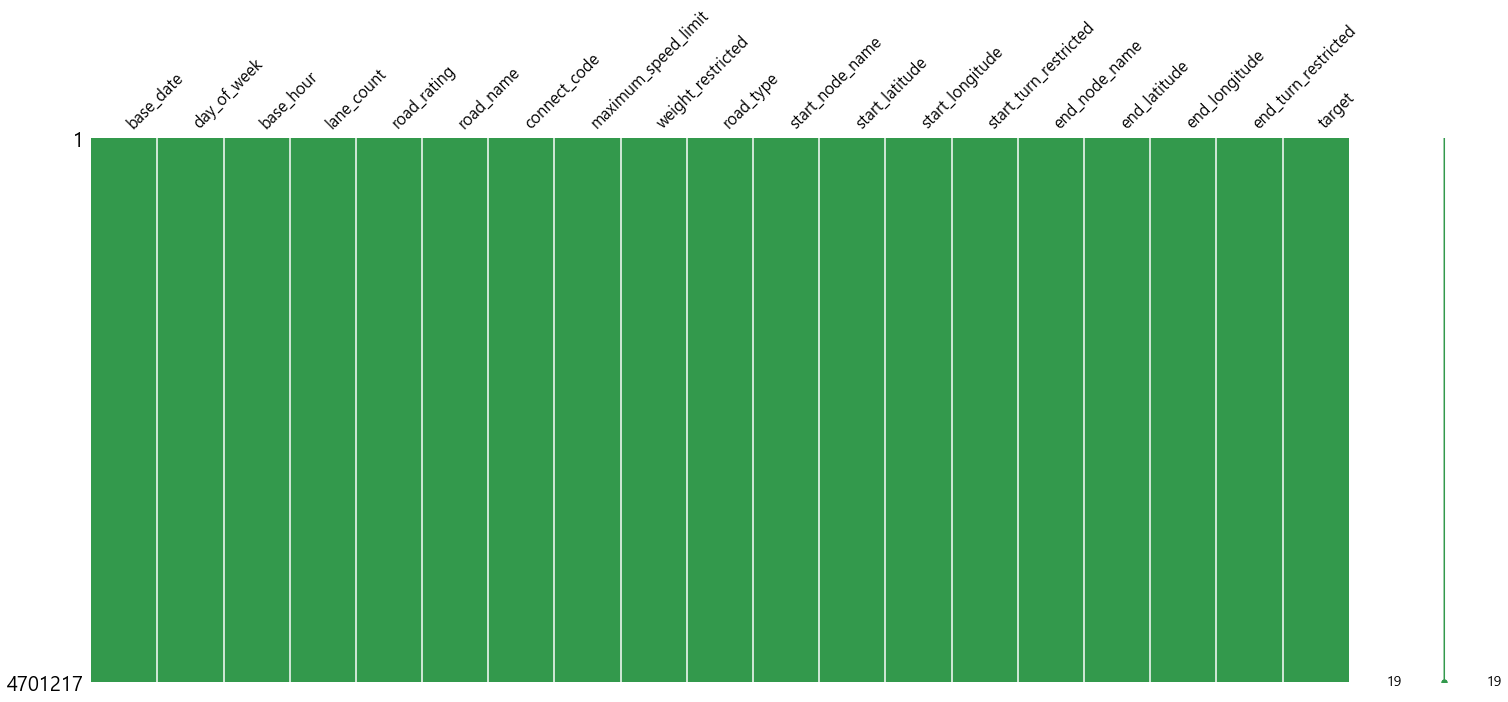

In [14]:
import missingno as msno
msno.matrix(df_train,color=(0.2,0.6,0.3)) # na Í∞íÏù¥ ÏóÜÏùå

# 2. ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ Î∂ÑÏÑù

In [15]:
df_train.corr()['target'].sort_values(ascending=False)

target                 1.000000
maximum_speed_limit    0.425715
weight_restricted      0.294092
road_type              0.200840
connect_code           0.048348
start_latitude         0.036280
end_latitude           0.036139
end_longitude         -0.001000
start_longitude       -0.001168
lane_count            -0.144256
base_hour             -0.159407
road_rating           -0.261693
Name: target, dtype: float64

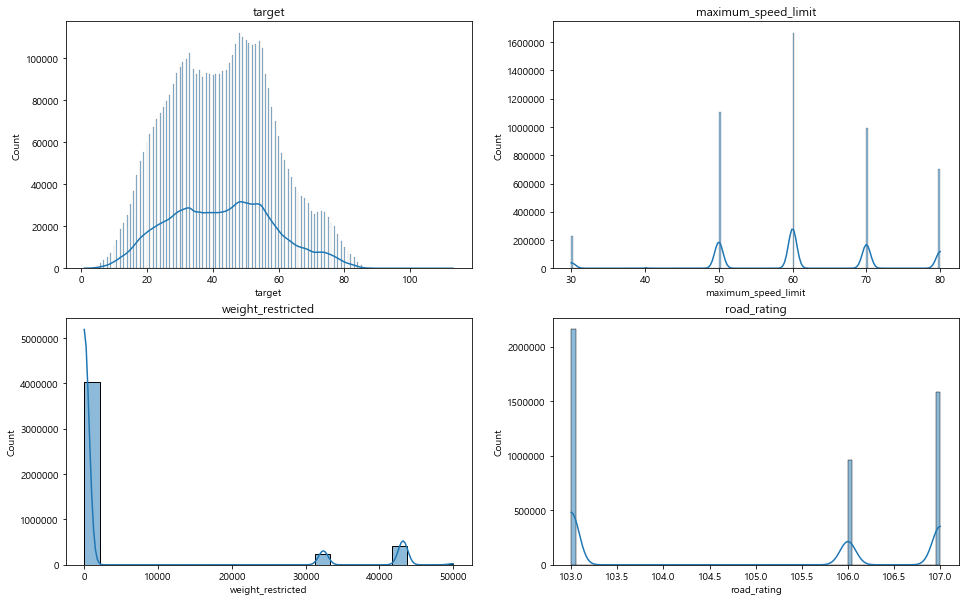

In [16]:
target_corr = abs(df_train.corr()['target']).sort_values(ascending=False)
plt.figure(figsize=(16,10))
for i in range(4):
    plt.subplot(2,2,i+1)
    sns.histplot(df_train[target_corr.keys()[i]], kde=True)
    plt.title(target_corr.keys()[i])

1. maximum_speed_limit    0.425715
2. weight_restricted      0.294092
3. road_type              0.200840
4. connect_code           0.048348

## 2.1 Îã§Ï§ë Í≥µÏÑ†ÏÑ± ÌôïÏù∏

In [17]:
corrs  = df_train.corr().sort_values('target', ascending=False)
threshold = .8
above_threshold_vars = {}
for col in corrs:
    above_threshold_vars[col] = list(corrs.index[corrs[col] > threshold])
    
above_threshold_vars # ÏãúÏûë,ÎèÑÏ∞©ÏßÄÏ†êÏùò Í≤ΩÏúÑÎèÑ Îëò Ï§ë ÌïòÎÇòÎäî Ï†úÍ±∞Ìï¥ÏïºÌï®

{'base_hour': ['base_hour'],
 'lane_count': ['lane_count'],
 'road_rating': ['road_rating'],
 'connect_code': ['connect_code'],
 'maximum_speed_limit': ['maximum_speed_limit'],
 'weight_restricted': ['weight_restricted'],
 'road_type': ['road_type'],
 'start_latitude': ['start_latitude', 'end_latitude'],
 'start_longitude': ['end_longitude', 'start_longitude'],
 'end_latitude': ['start_latitude', 'end_latitude'],
 'end_longitude': ['end_longitude', 'start_longitude'],
 'target': ['target']}

In [57]:
df_train = df_train.drop(columns=['end_longitude', 'end_latitude'])
df_test = df_test.drop(columns=['end_longitude', 'end_latitude'])

# 3. üõ£Ô∏è‚è∞ÏãúÍ≥µÍ∞Ñ Î∂ÑÏÑù

## 3.1 ÏãúÍ∞Ñ


    base_date              int64  
    day_of_week            object 
    base_hour              int64  

In [19]:
df_time = df_train[['base_date','day_of_week','base_hour','target']].copy()
df_time.head()

base_date day_of_week  base_hour  target
0 2022-06-23           Î™©         17    52.0
1 2022-07-28           Î™©         21    30.0
2 2021-10-10           Ïùº          7    61.0
3 2022-03-11           Í∏à         13    20.0
4 2021-10-05           Ìôî          8    38.0

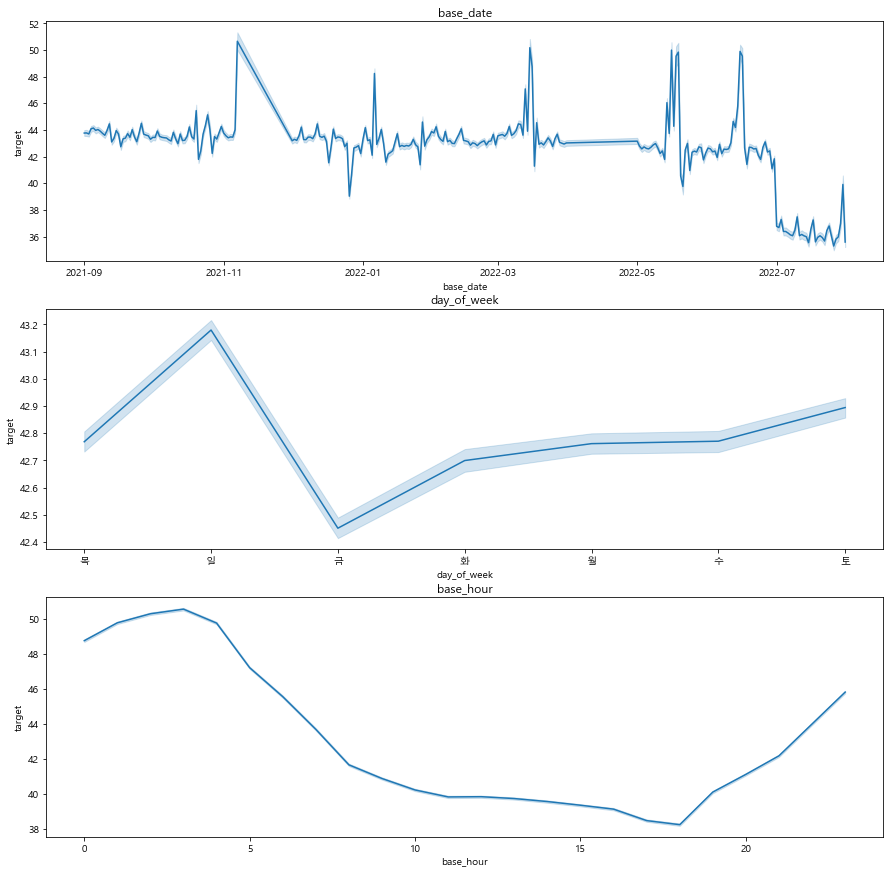

In [20]:
columns = np.array(df_time.columns)
plt.figure(figsize=(15,15))
for i in range(len(columns)-1):
    plt.subplot(3,1,i+1)
    sns.lineplot(x=df_time[columns[i]], y=df_time['target'])
    plt.title(columns[i])

In [21]:
df_time.groupby('day_of_week')['target'].mean().sort_values()

day_of_week
Í∏à    42.450328
Ìôî    42.699198
Ïõî    42.761365
Î™©    42.768345
Ïàò    42.770372
ÌÜ†    42.894117
Ïùº    43.179300
Name: target, dtype: float64

1. base_date: 7ÏõîÏóêÏÑú targetÏù¥ Ïú†ÏùòÎØ∏ÌïòÍ≤å Ï§ÑÏñ¥Îì§ÏóàÎã§. ÍµêÌÜµÏù¥ Ï†ïÏ≤¥ÎêòÏóàÎã§Îäî Í≤ÉÏù∏Îç∞ Î∞©Ìïô ÏãúÏ¶åÏù¥Îùº Í∑∏Îü∞ Í≤É Í∞ôÏùå. 2021ÎÖÑ 12ÏõîÏ¶àÏùåÏóê Í∞ëÏûêÍ∏∞ targetÏù¥ Ïª§ÏßÄÎäîÎç∞ ÏïÑÎßàÎèÑ Í≤®Ïö∏Ïù¥Í∏∞Ïóê ÎààÏù¥ Ïò§Îãà ÎãπÏó∞Ìûà Ï∞®Í∞Ä Î≥ÑÎ°ú ÏïàÎã§Îãê Í≤ÉÏúºÎ°ú Ï∂îÏ†ï

2. day_of_week: Î∂àÍ∏àÏù¥ÎùºÍ≥† Î∂àÎ¶¨Îäî Í∏àÏöîÏùºÏù¥ Í∞ÄÏû• Ï†ïÏ≤¥ÎêòÎäîÍ±∏ Ïïå Ïàò ÏûàÏùå. Ïù¥Ïô∏Î°ú ÏùºÏöîÏùºÏù¥ Í∞ÄÏû• targetÏù¥ ÎÜíÏùå
3. base_hour: ÎãπÏó∞Ìûà ÏÉàÎ≤ΩÏóê Í∞ÄÏû• Ï†ïÏ≤¥Í∞Ä ÏóÜÍ≥†, Ìá¥Í∑ºÏãúÍ∞ÑÏù¥ Í∞ÄÍπåÏõåÏßà ÏàòÎ°ù Ï†ïÏ≤¥Í∞Ä Ïã¨ÌïúÍ±∏ Ïïå Ïàò ÏûàÏùå

## 3.2 Í≥µÍ∞Ñ

	road_rating	ÎèÑÎ°úÎì±Í∏â
	multi_linked	Ï§ëÏö©Íµ¨Í∞Ñ Ïó¨Î∂Ä
	connect_code	Ïó∞Í≤∞Î°ú ÏΩîÎìú
	maximum_speed_limit	ÏµúÍ≥†ÏÜçÎèÑÏ†úÌïú
	weight_restricted	ÌÜµÍ≥ºÏ†úÌïúÌïòÏ§ë
	height_restricted	ÌÜµÍ≥ºÏ†úÌïúÎÜíÏù¥
	road_type	ÎèÑÎ°úÏú†Ìòï

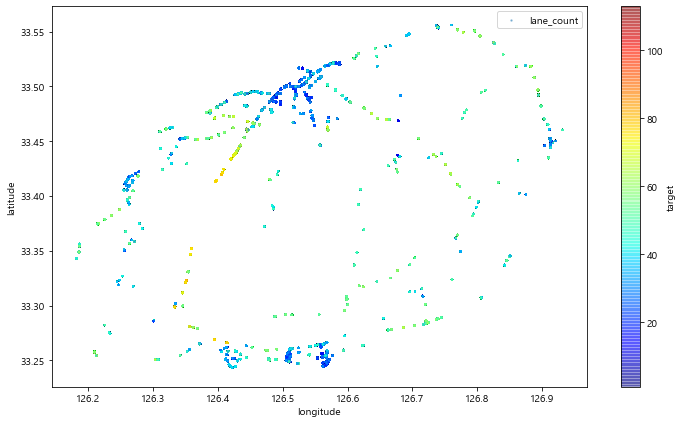

In [22]:
ax=df_train.plot(kind="scatter",x='start_longitude',y='start_latitude',alpha=.4,s=df_train['lane_count'],label='lane_count',
                figsize=(12,7),c='target',cmap=plt.get_cmap('jet'),colorbar=True,sharex=False)
ax.set(xlabel='longitude',ylabel='latitude')
plt.legend() #Ï§ëÎ∂Ä ÏÇ∞Í∞Ñ ÏßÄÎ∞© ÎòêÎäî Ìï¥ÏïàÎèÑÎ°úÏ£ºÎ≥ÄÏúºÎ°ú Í∞àÏàòÎ°ù targetÏù¥ Ïª§Ïßê

Ï∞æÏïÑÎ≥¥Îãà 2006ÎÖÑÎèÑÏóê Ï†úÏ£ºÎèÑÍ∞Ä Ï†úÏ£ºÌäπÎ≥ÑÏûêÏπòÎèÑÎ°ú Î∞îÎÄåÎ©¥ÏÑú Íµ≠ÎèÑÍ∞Ä ÏßÄÎ∞©Íµ≠ÎèÑÎ°ú Í≤©ÌïòÎêòÏóàÎã§Í≥† ÌïúÎã§.

- ÏùºÎ∞òÍµ≠ÎèÑ 12Ìò∏ÏÑ† -> ÏßÄÎ∞©ÎèÑ 1132Ìò∏ÏÑ†
- ÏùºÎ∞òÍµ≠ÎèÑ 11Ìò∏ÏÑ† -> ÏßÄÎ∞©ÎèÑ 1131Ìò∏ÏÑ†
- ÏùºÎ∞òÍµ≠ÎèÑ 95Ìò∏ÏÑ† -> ÏßÄÎ∞©ÎèÑ 1135Ìò∏ÏÑ†
- ÏùºÎ∞òÍµ≠ÎèÑ 16Ìò∏ÏÑ† -> ÏßÄÎ∞©ÎèÑ 1136Ìò∏ÏÑ†
- ÏùºÎ∞òÍµ≠ÎèÑ 99Ìò∏ÏÑ† -> ÏßÄÎ∞©ÎèÑ 1139Ìò∏ÏÑ†

ÌïòÏßÄÎßå Îç∞Ïù¥ÌÑ∞ÏóêÎäî Î∞òÏòÅÏù¥ ÎêòÏßÄ ÏïäÏïÑÏÑú Í∞ôÏùÄ ÎèÑÎ°úÏßÄÎßå ÏÑúÎ°ú Îã§Î•∏ 2Í∞úÏùò ÌëúÍ∏∞Î•º ÎëòÎã§ ÏÇ¨Ïö©ÌïòÍ≥† ÏûàÎã§.

In [57]:
df_train['road_name'].unique()

array(['ÏßÄÎ∞©ÎèÑ1112Ìò∏ÏÑ†', 'ÏùºÎ∞òÍµ≠ÎèÑ11Ìò∏ÏÑ†', 'ÏùºÎ∞òÍµ≠ÎèÑ16Ìò∏ÏÑ†', 'ÌÉúÌèâÎ°ú', 'ÏùºÎ∞òÍµ≠ÎèÑ12Ìò∏ÏÑ†', 'Í≤ΩÏ∞∞Î°ú', '-',
       'Ïô∏ÎèÑÏ≤úÍµê', 'ÏùºÎ∞òÍµ≠ÎèÑ99Ìò∏ÏÑ†', 'Ï§ëÏ†ïÎ°ú', 'Î≤àÏòÅÎ°ú', 'Ïó∞ÎèôÎ°ú', 'Ï§ëÏÇ∞Í∞ÑÏÑúÎ°ú', 'ÏßÄÎ∞©ÎèÑ1118Ìò∏ÏÑ†',
       'ÏÉàÏÑúÍ∑ÄÎ°ú', 'ÏßÄÎ∞©ÎèÑ1115Ìò∏ÏÑ†', 'ÏßÄÎ∞©ÎèÑ1132Ìò∏ÏÑ†', 'Ïñ¥ÏãúÏ≤úÍµê', 'ÏßÄÎ∞©ÎèÑ1120Ìò∏ÏÑ†', 'ÏÇºÎ¨¥Î°ú',
       'Ïï†Ï°∞Î°ú', 'ÏßÄÎ∞©ÎèÑ1116Ìò∏ÏÑ†', 'ÏùºÎ∞òÍµ≠ÎèÑ95Ìò∏ÏÑ†', 'ÎèôÎ∂ÄÍ¥ÄÍ¥ëÎèÑÎ°ú', 'ÎèôÌôçÎ°ú', 'ÏßÄÎ∞©ÎèÑ97Ìò∏ÏÑ†', 'Ï§ëÎ¨∏Î°ú',
       'Ïó∞ÏÇºÎ°ú', 'Ï§ëÏïôÎ°ú', 'ÏÇ∞ÏÑúÎ°ú', 'ÏßÄÎ∞©ÎèÑ1117Ìò∏ÏÑ†', 'Ïó∞Î∂ÅÎ°ú', 'ÎÇ®Ï°∞Î°ú', 'ÏßÄÎ∞©ÎèÑ1119Ìò∏ÏÑ†', 'ÎèôÎ¨∏Î°ú',
       'ÌïúÏ≤úÎ°ú', 'ÏÇºÎ¥âÎ°ú', 'Í≥†ÌèâÍµê', 'Ïó∞Î∂Å2Íµê', 'Í¥ÄÍ¥ëÎã®ÏßÄÎ°ú', 'Í∂åÌïôÎ°ú', 'ÏãúÏ≤≠Î°ú', 'Ïã†ÎåÄÎ°ú', 'ÏÑúÏÇ¨Î°ú',
       'Í¥ÄÎçïÎ°ú', 'Í¥ÄÍ¥ëÎã®ÏßÄ1Î°ú', 'Ïã†ÏÇ∞Î°ú', 'Í¥ÄÍ¥ëÎã®ÏßÄ2Î°ú', 'Ïã†Í¥ëÎ°ú', 'ÏßÄÎ∞©ÎèÑ1136Ìò∏ÏÑ†', 'Ï≤®Îã®Î°ú',
       'Ï†ú2Í±∞Î°úÍµê', 'ÏãúÎØºÍ¥ëÏû•Î°ú', 'ÏûÑÌï≠Î°ú', 'ÏàòÏòÅÏû•Í∏∏', 'Ïï†ÏõêÎ°ú', 'ÏÇºÏÑ±Î°ú', 

[Text(0, 0.5, 'latitude'), Text(0.5, 0, 'longitude')]

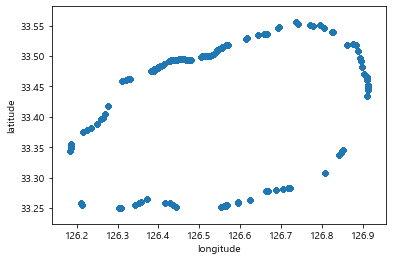

In [44]:
ax=df_train[df_train['road_name']== 'ÏùºÎ∞òÍµ≠ÎèÑ12Ìò∏ÏÑ†'].plot(kind="scatter",x='start_longitude',y='start_latitude')
ax.set(xlabel='longitude',ylabel='latitude')

[Text(0, 0.5, 'latitude'), Text(0.5, 0, 'longitude')]

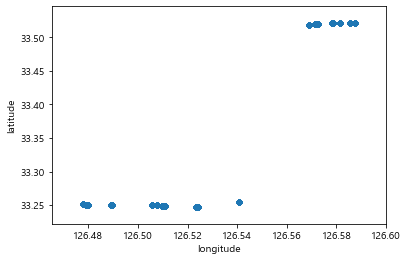

In [45]:
ax=df_train[df_train['road_name']== 'ÏßÄÎ∞©ÎèÑ1132Ìò∏ÏÑ†'].plot(kind="scatter",x='start_longitude',y='start_latitude')
ax.set(xlabel='longitude',ylabel='latitude')

# 4. Î≤îÏ£ºÌòï ÏûêÎ£å

In [60]:
df_train_categorical = df_train.select_dtypes('object').copy()
df_train_categorical.head()

day_of_week  road_name start_node_name start_turn_restricted end_node_name  \
0           Î™©  ÏßÄÎ∞©ÎèÑ1112Ìò∏ÏÑ†           Ï†ú3ÍµêÎûòÍµê                    ÏóÜÏùå         Ï†ú3ÍµêÎûòÍµê   
1           Î™©   ÏùºÎ∞òÍµ≠ÎèÑ11Ìò∏ÏÑ†           Í¥ëÏñëÏÇ¨Í±∞Î¶¨                    ÏûàÏùå        KALÏÇ¨Í±∞Î¶¨   
2           Ïùº   ÏùºÎ∞òÍµ≠ÎèÑ16Ìò∏ÏÑ†            Ï∞ΩÍ≥†Ï≤úÍµê                    ÏóÜÏùå          ÏÉÅÏ∞ΩÏú°Íµê   
3           Í∏à        ÌÉúÌèâÎ°ú           ÎÇ®ÏñëÎ¶¨Ï°∞Ìä∏                    ÏóÜÏùå          ÏÑúÌòÑÏ£ºÌÉù   
4           Ìôî   ÏùºÎ∞òÍµ≠ÎèÑ12Ìò∏ÏÑ†            Ïï†ÏõîÏÉ∑Ïãú                    ÏóÜÏùå          Ïï†ÏõîÏûÖÍµ¨   

  end_turn_restricted  
0                  ÏóÜÏùå  
1                  ÏóÜÏùå  
2                  ÏóÜÏùå  
3                  ÏóÜÏùå  
4                  ÏóÜÏùå

In [24]:
df_train_categorical['day_of_week'].value_counts()

Í∏à    684024
Ïàò    675583
Î™©    674070
Ïùº    673632
ÌÜ†    669767
Ìôî    662498
Ïõî    661643
Name: day_of_week, dtype: int64

In [25]:
df_train_categorical['road_name'].unique()

array(['ÏßÄÎ∞©ÎèÑ1112Ìò∏ÏÑ†', 'ÏùºÎ∞òÍµ≠ÎèÑ11Ìò∏ÏÑ†', 'ÏùºÎ∞òÍµ≠ÎèÑ16Ìò∏ÏÑ†', 'ÌÉúÌèâÎ°ú', 'ÏùºÎ∞òÍµ≠ÎèÑ12Ìò∏ÏÑ†', 'Í≤ΩÏ∞∞Î°ú', '-',
       'Ïô∏ÎèÑÏ≤úÍµê', 'ÏùºÎ∞òÍµ≠ÎèÑ99Ìò∏ÏÑ†', 'Ï§ëÏ†ïÎ°ú', 'Î≤àÏòÅÎ°ú', 'Ïó∞ÎèôÎ°ú', 'Ï§ëÏÇ∞Í∞ÑÏÑúÎ°ú', 'ÏßÄÎ∞©ÎèÑ1118Ìò∏ÏÑ†',
       'ÏÉàÏÑúÍ∑ÄÎ°ú', 'ÏßÄÎ∞©ÎèÑ1115Ìò∏ÏÑ†', 'ÏßÄÎ∞©ÎèÑ1132Ìò∏ÏÑ†', 'Ïñ¥ÏãúÏ≤úÍµê', 'ÏßÄÎ∞©ÎèÑ1120Ìò∏ÏÑ†', 'ÏÇºÎ¨¥Î°ú',
       'Ïï†Ï°∞Î°ú', 'ÏßÄÎ∞©ÎèÑ1116Ìò∏ÏÑ†', 'ÏùºÎ∞òÍµ≠ÎèÑ95Ìò∏ÏÑ†', 'ÎèôÎ∂ÄÍ¥ÄÍ¥ëÎèÑÎ°ú', 'ÎèôÌôçÎ°ú', 'ÏßÄÎ∞©ÎèÑ97Ìò∏ÏÑ†', 'Ï§ëÎ¨∏Î°ú',
       'Ïó∞ÏÇºÎ°ú', 'Ï§ëÏïôÎ°ú', 'ÏÇ∞ÏÑúÎ°ú', 'ÏßÄÎ∞©ÎèÑ1117Ìò∏ÏÑ†', 'Ïó∞Î∂ÅÎ°ú', 'ÎÇ®Ï°∞Î°ú', 'ÏßÄÎ∞©ÎèÑ1119Ìò∏ÏÑ†', 'ÎèôÎ¨∏Î°ú',
       'ÌïúÏ≤úÎ°ú', 'ÏÇºÎ¥âÎ°ú', 'Í≥†ÌèâÍµê', 'Ïó∞Î∂Å2Íµê', 'Í¥ÄÍ¥ëÎã®ÏßÄÎ°ú', 'Í∂åÌïôÎ°ú', 'ÏãúÏ≤≠Î°ú', 'Ïã†ÎåÄÎ°ú', 'ÏÑúÏÇ¨Î°ú',
       'Í¥ÄÎçïÎ°ú', 'Í¥ÄÍ¥ëÎã®ÏßÄ1Î°ú', 'Ïã†ÏÇ∞Î°ú', 'Í¥ÄÍ¥ëÎã®ÏßÄ2Î°ú', 'Ïã†Í¥ëÎ°ú', 'ÏßÄÎ∞©ÎèÑ1136Ìò∏ÏÑ†', 'Ï≤®Îã®Î°ú',
       'Ï†ú2Í±∞Î°úÍµê', 'ÏãúÎØºÍ¥ëÏû•Î°ú', 'ÏûÑÌï≠Î°ú', 'ÏàòÏòÅÏû•Í∏∏', 'Ïï†ÏõêÎ°ú', 'ÏÇºÏÑ±Î°ú', 

In [26]:
df_train_categorical[df_train_categorical['road_name']=='-']

day_of_week road_name start_node_name start_turn_restricted  \
6                 Î™©         -              Í∞ÄÎèô                    ÏóÜÏùå   
14                Î™©         -             ÏÜ°Î™©Íµê                    ÏóÜÏùå   
28                Ïùº         -           Í¥ëÌèâÍµêÏ∞®Î°ú                    ÏóÜÏùå   
30                Î™©         -            ÏùºÌò∏Ïú†Î¶¨                    ÏóÜÏùå   
31                Î™©         -             ÎÇ®ÏàòÍµê                    ÏóÜÏùå   
...             ...       ...             ...                   ...   
4701204           Í∏à         -           ÌïúÎÇ®ÍµêÏ∞®Î°ú                    ÏóÜÏùå   
4701205           Ïàò         -            Í∞êÍ∑§Ï∞ΩÍ≥†                    ÏóÜÏùå   
4701208           Ïàò         -           Ï†ú2ÌÉúÌù•Íµê                    ÏóÜÏùå   
4701212           Î™©         -           ÎåÄÎ¶ºÏÇ¨Í±∞Î¶¨                    ÏóÜÏùå   
4701213           Î™©         -             Í¥ëÏÇºÍµê                    ÏóÜÏùå   

        end_node_name end_turn_restricted  
6                  ÎÇòÎèô                  ÏóÜÏùå  
14                ÏÜ°Î™©Íµê                  ÏóÜÏùå  
28                 Í∏àÏïÖ                  ÏóÜÏùå  
30              ÏÉÅÍ∑ÄÍµêÏ∞®Î°ú                  ÏóÜÏùå  
31                ÎÇ®ÏàòÍµê                  ÏóÜÏùå  
...               ...                 ...  
4701204          ÏÑúÏ§ë2Íµê                  ÏóÜÏùå  
4701205            ÏàòÌòë                  ÏóÜÏùå  
4701208         Ï†ú2ÌÉúÌù•Íµê                  ÏóÜÏùå  
4701212          Í∏àÎçïÌï¥Ïö¥                  ÏóÜÏùå  
4701213           Í¥ëÏÇºÍµê                  ÏóÜÏùå  

[569463 rows x 6 columns]

In [27]:
print('ÌëúÍ∏∞ÏïàÎêú ÎèÑÎ°ú ÎπÑÏú®: {0:.4f}%'.format(569463/4701217)) # 12ÌîÑÎ°ú Ïñ¥ÎñªÍ≤å Ï±ÑÏö∏ÍπåÏöî???

ÌëúÍ∏∞ÏïàÎêú ÎèÑÎ°ú ÎπÑÏú®: 0.1211%


In [58]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4701212 entries, 0 to 4701216
Data columns (total 17 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   base_date              datetime64[ns]
 1   day_of_week            object        
 2   base_hour              int32         
 3   lane_count             int32         
 4   road_rating            int32         
 5   road_name              object        
 6   connect_code           int32         
 7   maximum_speed_limit    float32       
 8   weight_restricted      float32       
 9   road_type              int32         
 10  start_node_name        object        
 11  start_latitude         float64       
 12  start_longitude        float64       
 13  start_turn_restricted  object        
 14  end_node_name          object        
 15  end_turn_restricted    object        
 16  target                 float32       
dtypes: datetime64[ns](1), float32(3), float64(2), int32(5), object(6)

In [56]:
df_train[df_train['road_name']=='-'].iloc[:,4:13] # road

road_rating road_name  connect_code  maximum_speed_limit  \
6                107         -             0                 60.0   
14               107         -             0                 60.0   
28               107         -             0                 50.0   
30               107         -             0                 80.0   
31               107         -             0                 60.0   
...              ...       ...           ...                  ...   
4701204          107         -             0                 60.0   
4701205          107         -             0                 50.0   
4701208          107         -             0                 80.0   
4701212          107         -             0                 50.0   
4701213          107         -             0                 80.0   

         weight_restricted  road_type start_node_name  start_latitude  \
6                      0.0          0              Í∞ÄÎèô       33.418412   
14                 43200.0          3             ÏÜ°Î™©Íµê       33.316913   
28                     0.0          0           Í¥ëÌèâÍµêÏ∞®Î°ú       33.330822   
30                     0.0          0            ÏùºÌò∏Ïú†Î¶¨       33.472276   
31                 43200.0          3             ÎÇ®ÏàòÍµê       33.337244   
...                    ...        ...             ...             ...   
4701204                0.0          0           ÌïúÎÇ®ÍµêÏ∞®Î°ú       33.325096   
4701205                0.0          0            Í∞êÍ∑§Ï∞ΩÍ≥†       33.450215   
4701208            43200.0          3           Ï†ú2ÌÉúÌù•Íµê       33.287356   
4701212                0.0          0           ÎåÄÎ¶ºÏÇ¨Í±∞Î¶¨       33.422145   
4701213            43200.0          3             Í¥ëÏÇºÍµê       33.472505   

         start_longitude  
6             126.268029  
14            126.624634  
28            126.354179  
30            126.418443  
31            126.695809  
...                  ...  
4701204       126.665698  
4701205       126.920771  
4701208       126.736525  
4701212       126.278125  
4701213       126.424368  

[569463 rows x 9 columns]

In [68]:
from sklearn import preprocessing

object_col = df_train_categorical.columns

for i in object_col:
    le = preprocessing.LabelEncoder()
    le=le.fit(df_train[i])
    df_train[i]=le.transform(df_train[i])
    
    for label in np.unique(df_test[i]):
        if label not in le.classes_: 
            le.classes_ = np.append(le.classes_, label)
    df_test[i]=le.transform(df_test[i])

In [69]:
df_train.head()

base_date  day_of_week  base_hour  lane_count  road_rating  road_name  \
0 2022-06-23            1         17           1          106         46   
1 2022-07-28            1         21           2          103         34   
2 2021-10-10            4          7           2          103         36   
3 2022-03-11            0         13           2          107         57   
4 2021-10-05            6          8           2          103         35   

   connect_code  maximum_speed_limit  weight_restricted  road_type  \
0             0                 60.0            32400.0          3   
1             0                 60.0                0.0          0   
2             0                 80.0                0.0          0   
3             0                 50.0                0.0          0   
4             0                 80.0                0.0          0   

   start_node_name  start_latitude  start_longitude  start_turn_restricted  \
0              386       33.427747       126.662612                      0   
1               32       33.500730       126.529107                      1   
2              426       33.279145       126.368598                      0   
3               58       33.246081       126.567204                      0   
4              267       33.462214       126.326551                      0   

   end_node_name  end_turn_restricted  target  
0            386                    0    52.0  
1              2                    0    30.0  
2            179                    0    61.0  
3            203                    0    20.0  
4            269                    0    38.0